# Screen Capture

In [1]:
def makingdatabase():
    import pyscreenshot as ImageGrab
    import time
    images_folder="captured_images/9/"
 
    for i in range(0,10):
        time.sleep(8)
        im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
        print("saved......",i)
        im.save(images_folder+str(i)+'.png')
        print("clear screen now and redraw now........")

In [4]:
import cv2
import csv
import glob
 
header  =["label"]
for i in range(0,784):
    header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

for label in range(10):
    dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
    for img_path in dirList:
        im= cv2.imread(img_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
        roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
        data=[]
        data.append(label)
        rows, cols = roi.shape
        
        for i in range(rows):
            for j in range(cols):
                k =roi[i,j]
                if k>100:
                    k=1
                else:
                    k=0
                data.append(k)
        with open('dataset.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)

# Load the dataset

In [5]:
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
78,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = data.drop(["label"],axis=1)
Y= data["label"]

6


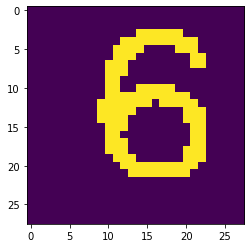

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 53
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [9]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [10]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.6666666666666666


# prediction

In [13]:
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
model=joblib.load("model/digit_recognizer")
images_folder="img/"
while True:
    img=ImageGrab.grab(bbox=(60,170,400,500))
    img.save(images_folder+"img.png")
    im = cv2.imread(images_folder+"img.png")
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
    ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    rows,cols=roi.shape
    
    X = []
   
   ## Add pixel one by one into data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i,j]
            if k>100:
                k=1
            else:
                k=0
            X.append(k)
    
    predictions  =model.predict([X])
    print("Prediction:",predictions[0])
    cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result",im)
    cv2.waitKey(10000)
    if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
        break
cv2.destroyAllWindows()

Prediction: 6
Prediction: 6
Prediction: 1
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 9
Prediction: 1
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 7
Prediction: 7
